In [1]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
from datetime import datetime

In [2]:
def get_dataframe_from_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset

def scatter_plot(dataset, given_data, var,y):
    target = var
    data = pd.concat([given_data, dataset[target]], axis=1)
    data.plot.scatter(x=target, y=y, ylim=(0,800000), figsize=(16,10))

In [3]:
dataset = get_dataframe_from_csv("/home/forhad/Study/Self_Work/XXX/dataset_trvg_case-2.csv")

In [4]:
dataset['date_ymd'] = dataset['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [5]:
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent
0,2020-07-29,8,1,FI,345,22,0,0,51
1,2020-04-28,41,13,US,64,5,0,0,146
2,2020-08-10,2,1,IL,64,351,5,103666,3474
3,2020-08-24,8,15,TR,139,8,0,0,48
4,2020-09-10,2,13,HK,56,7,0,0,73
...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8
1008214,2020-10-22,29,2,TW,56,53,2,25779,666
1008215,2020-12-07,15,8,ZA,56,5,0,0,44
1008216,2020-06-16,301,4,CH,56,2,0,0,3


#### Conversion Rate calculation

In [6]:
dataset['conversion_rate'] = ((dataset['bookings']/dataset['clicks'])*100).map('{:,.2f}'.format)

In [7]:
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent,conversion_rate
0,2020-07-29,8,1,FI,345,22,0,0,51,0.00
1,2020-04-28,41,13,US,64,5,0,0,146,0.00
2,2020-08-10,2,1,IL,64,351,5,103666,3474,1.42
3,2020-08-24,8,15,TR,139,8,0,0,48,0.00
4,2020-09-10,2,13,HK,56,7,0,0,73,0.00
...,...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8,0.00
1008214,2020-10-22,29,2,TW,56,53,2,25779,666,3.77
1008215,2020-12-07,15,8,ZA,56,5,0,0,44,0.00
1008216,2020-06-16,301,4,CH,56,2,0,0,3,0.00


In [8]:
dataset.drop(dataset.index[dataset['conversion_rate'] == 0], inplace = True)
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent,conversion_rate
0,2020-07-29,8,1,FI,345,22,0,0,51,0.00
1,2020-04-28,41,13,US,64,5,0,0,146,0.00
2,2020-08-10,2,1,IL,64,351,5,103666,3474,1.42
3,2020-08-24,8,15,TR,139,8,0,0,48,0.00
4,2020-09-10,2,13,HK,56,7,0,0,73,0.00
...,...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8,0.00
1008214,2020-10-22,29,2,TW,56,53,2,25779,666,3.77
1008215,2020-12-07,15,8,ZA,56,5,0,0,44,0.00
1008216,2020-06-16,301,4,CH,56,2,0,0,3,0.00


Create a mini dataset

In [9]:
columns = ['date_ymd', 'conversion_rate', 'cost_EURcent', 'platform_country_code']
mini_dataset = dataset[columns]
mini_dataset.reindex(columns=columns)

,date_ymd,conversion_rate,cost_EURcent,platform_country_code
0,2020-07-29,0.00,51,FI
1,2020-04-28,0.00,146,US
2,2020-08-10,1.42,3474,IL
3,2020-08-24,0.00,48,TR
4,2020-09-10,0.00,73,HK
...,...,...,...,...
1008213,2020-04-15,0.00,8,HU
1008214,2020-10-22,3.77,666,TW
1008215,2020-12-07,0.00,44,ZA
1008216,2020-06-16,0.00,3,CH


#### Taks 1a - Highest Revenue Generated Country based on cost and conversion rate

In [10]:
revenue = mini_dataset.groupby(
    ['platform_country_code']).agg(revenue=('cost_EURcent', np.sum), conversion_ratio=('conversion_rate', np.max)).sort_index(ascending=True)

In [11]:
revenue

,revenue,conversion_ratio
platform_country_code,,
AA,4876015,9.80
AE,5811376,9.86
AR,3437444,9.52
AT,7540203,9.68
BE,5534123,9.80
BG,986338,9.80
CH,7151346,9.52
CL,1241746,9.38
CZ,666222,9.09


#### Aggregate for 3 highest revenue generated platform

The following graph is the representation of the 3 platforms that generated the highest revenue for XXX based on booking conversion. Tourists prefer US, TR and MY more when it times to travel with groups or solo.

<AxesSubplot:xlabel='platform_country_code'>

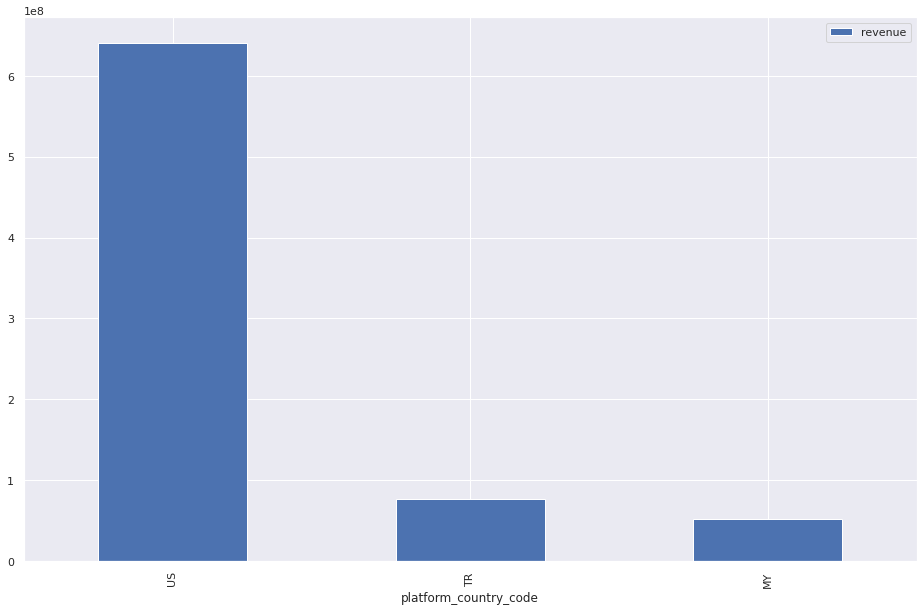

In [12]:
revenue.drop([revenue.index[40] , revenue.index[43]]
            ).nlargest(3, 'revenue').plot(kind='bar',y='revenue', figsize = ([16,10]))

Text(0.5, 1.0, 'Targetted country in the Ad Campaign')

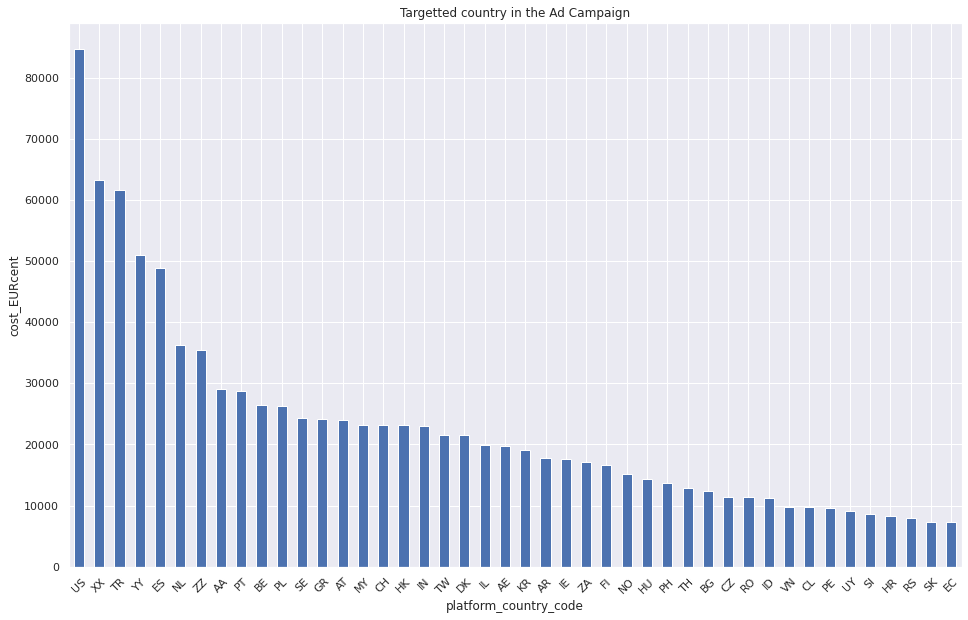

In [13]:
mini_dataset['platform_country_code'].value_counts().plot(kind='bar', figsize = ([16,10]))
plt.xticks(rotation=45)
plt.xlabel('platform_country_code')
plt.ylabel('cost_EURcent')
plt.title('Targetted country in the Ad Campaign')


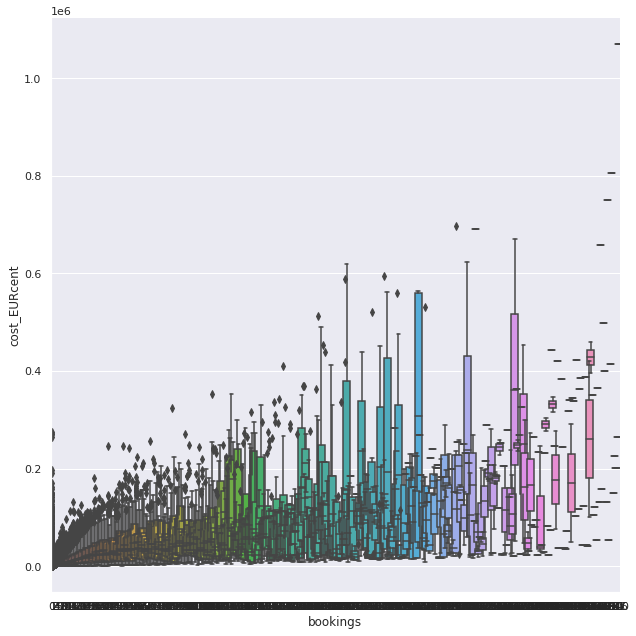

In [14]:
sns.catplot(
    data=dataset, 
    x='bookings', y='cost_EURcent', kind='box',
    height=9, aspect=1, width=5
)

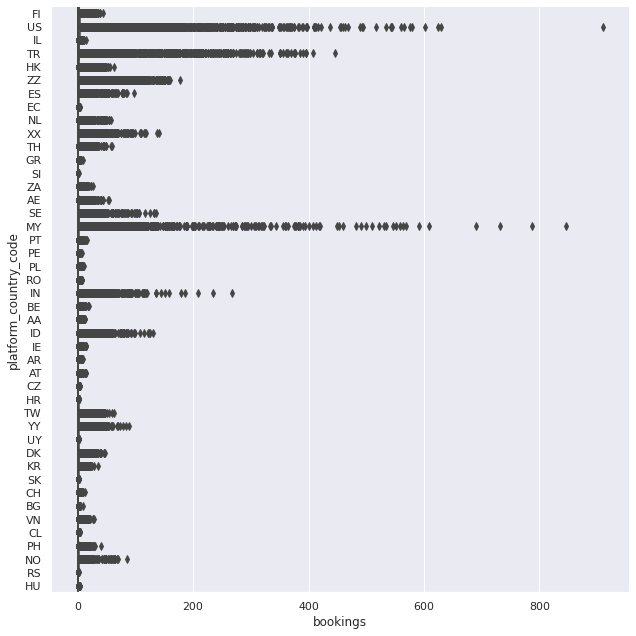

In [15]:
sns.catplot(
    data=dataset, 
    x='bookings', y='platform_country_code', kind='box',
    height=9, aspect=1, width=5
)

By the visual representations of the above data graph, it is safe to say that the trends of having the highest revenue from the targeted platform will likely to go on. The graph between Bookings and cost_EURcent(revenue for XXX), gives us a glimps of the data. Where more bookings means generating more revenue for XXX. 

US, TR and MY has the highest responses over the advertisements, revenue generation for the advertisers, revenue generation for XXX and flexible travel plans for the travel groups. The main driver would be targeting specific region with keep in mind specific targeted group and spends more on advisements. The more people see the advertisements, the more clicks will likely to generate and also more revenue will generate.

Text(0.5, 1.0, 'Targetted country in the Ad Campaign')

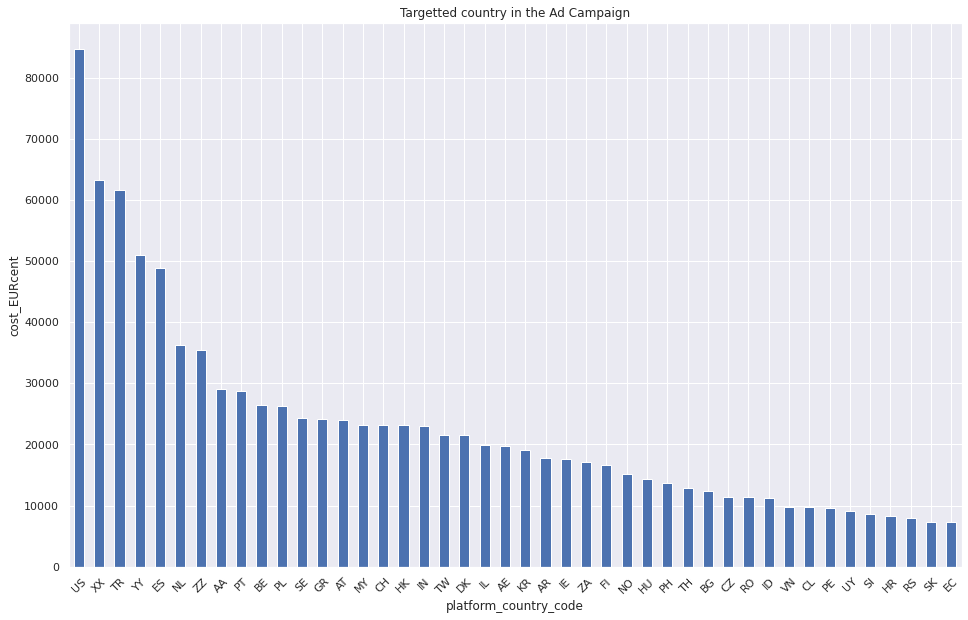

In [16]:
dataset.platform_country_code.value_counts().plot(kind='bar', figsize = (16,10))
plt.xticks(rotation=45)
plt.xlabel('platform_country_code')
plt.ylabel('cost_EURcent')
plt.title('Targetted country in the Ad Campaign')


Text(0.5, 1.0, 'Targetted country in the Ad Campaign clicks')

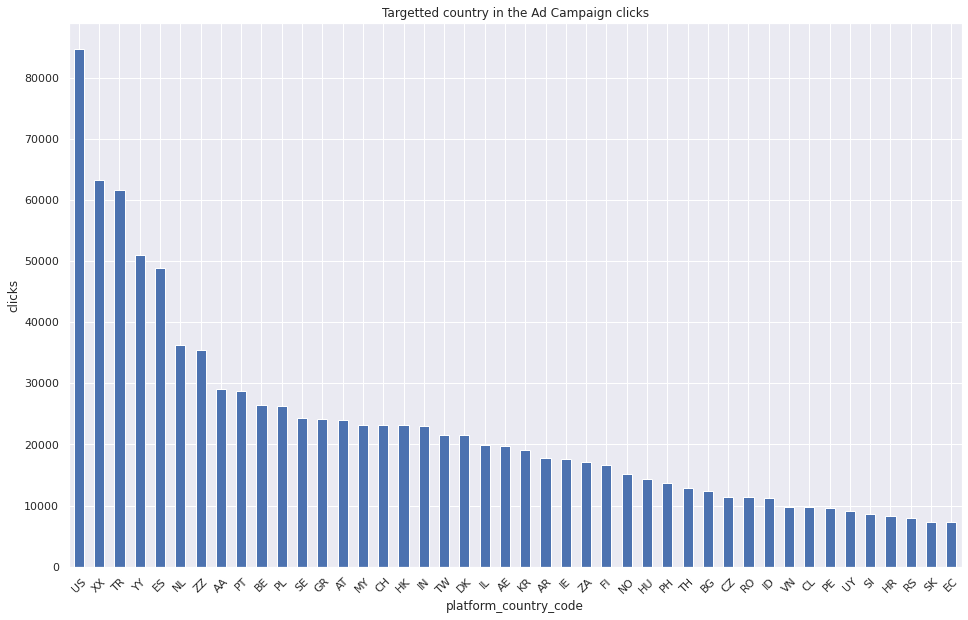

In [20]:
dataset.platform_country_code.value_counts().plot(kind='bar', figsize = (16,10))
plt.xticks(rotation=45)
plt.xlabel('platform_country_code')
plt.ylabel('clicks')
plt.title('Targetted country in the Ad Campaign clicks')

Since, the highest 3 platforms which generate much revenue, it was visible that bookings and conversion rate plays a huge role. From the graph:

- value from TR and value from XX seems likely to be the closest value. Also, conversion wise, XX and TR has the closest value. We can safe to say that, XX and TR is the same.
- from the revenue vs conversion graph and country vs bookings vs clicks graph tells us that, YY and ES , have the closest values. Conversion rate 9.89 and 9.92 are close, hence XX could be ES in countries
- and for ZZ, we can also assumes that NL and ZZ could be same country.